In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import regex as re
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer ,WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay ,confusion_matrix ,classification_report ,accuracy_score ,precision_score, recall_score ,f1_score
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB , ComplementNB
from sklearn.svm import LinearSVC
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional,SimpleRNN ,GlobalMaxPooling1D, SpatialDropout1D,GRU
from tensorflow.keras.optimizers import Adam
from gensim.models import Word2Vec , FastText
from wordcloud import WordCloud
import torch
from transformers import BertTokenizer, BertModel, DistilBertTokenizer, DistilBertModel ,TFDistilBertForSequenceClassification


In [6]:
true = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
fake = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')

In [7]:

# true = pd.read_csv("True.csv")
# fake = pd.read_csv("Fake.csv")


In [8]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
true.shape

(21417, 4)

In [10]:
fake.shape

(23481, 4)

In [11]:
fake['label'] = 0
true['label'] = 1

In [12]:
df = pd.concat([fake ,true] , axis=0)
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [13]:
df.tail()

,title,text,subject,date,label
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [14]:
df['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east', 'politicsNews', 'worldnews'], dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


<Axes: xlabel='label'>

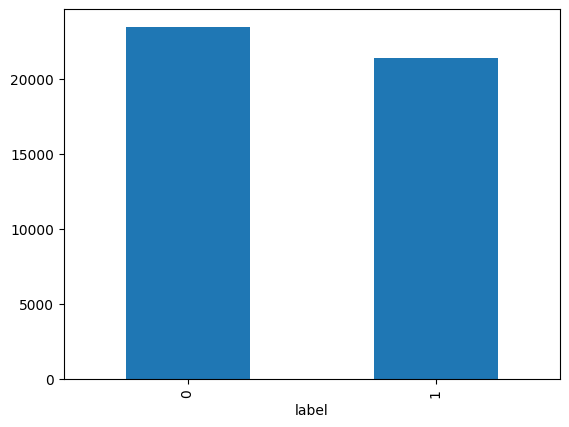

In [16]:
df['label'].value_counts().plot.bar()

In [17]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')
sw = set(stopwords.words('english'))
wn = WordNetLemmatizer()
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [18]:
def clean_text(text):
    text = text.lower()
    remove_punct = re.sub(r'[^a-z\s]','',text)
    tokens = word_tokenize(remove_punct)
    st_word = [ word for word in tokens if word not in sw]
    #stem = [sp.stemm(word) for word in st_word]
    lem_text = [wn.lemmatize(word) for word in st_word]
    return ' '.join(lem_text)


In [19]:
dff =df.copy()

In [20]:
dff['full text'] = dff['title'] +' ' + dff['text']


In [21]:
dff.drop(['title','text','date'],axis=1, inplace=True)

In [22]:
dff.head()

,subject,label,full text
0,News,0,Donald Trump Sends Out Embarrassing New Year’...
1,News,0,Drunk Bragging Trump Staffer Started Russian ...
2,News,0,Sheriff David Clarke Becomes An Internet Joke...
3,News,0,Trump Is So Obsessed He Even Has Obama’s Name...
4,News,0,Pope Francis Just Called Out Donald Trump Dur...


In [23]:
dff['full text'] = dff['full text'].apply(lambda x : clean_text(x))

In [24]:
from wordcloud import STOPWORDS

def plot_wordcloud(label):
    text = " ".join(dff[dff.label == label]['full text'])
    wc = WordCloud(
        stopwords=STOPWORDS,
        max_words=2000,
        width=1600,
        height=800,
        background_color="white"
    ).generate(text)
    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

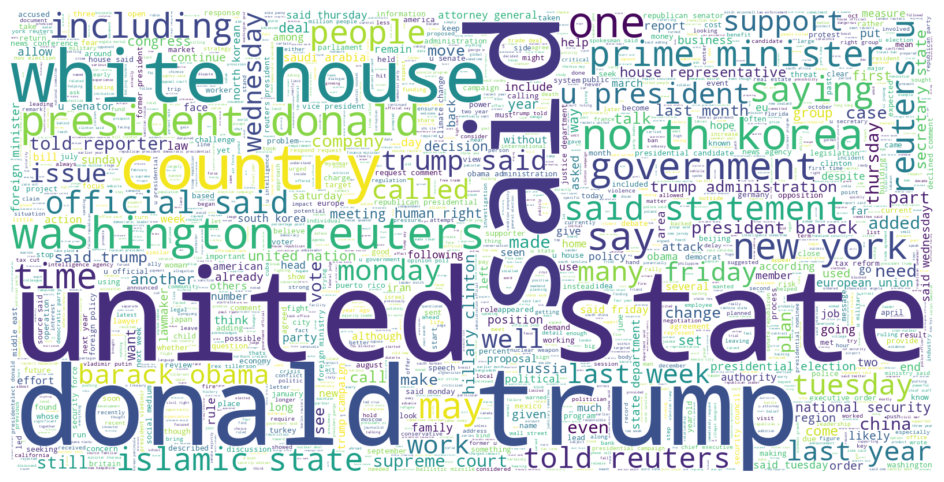

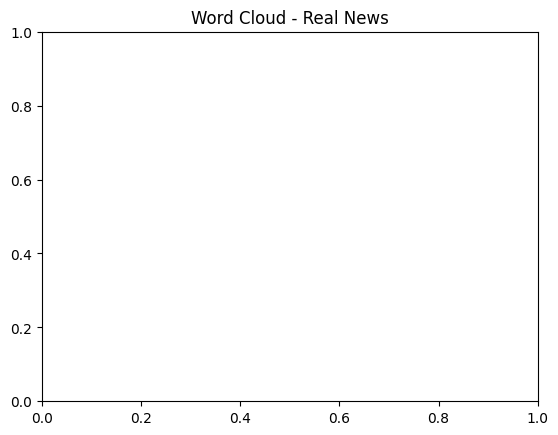

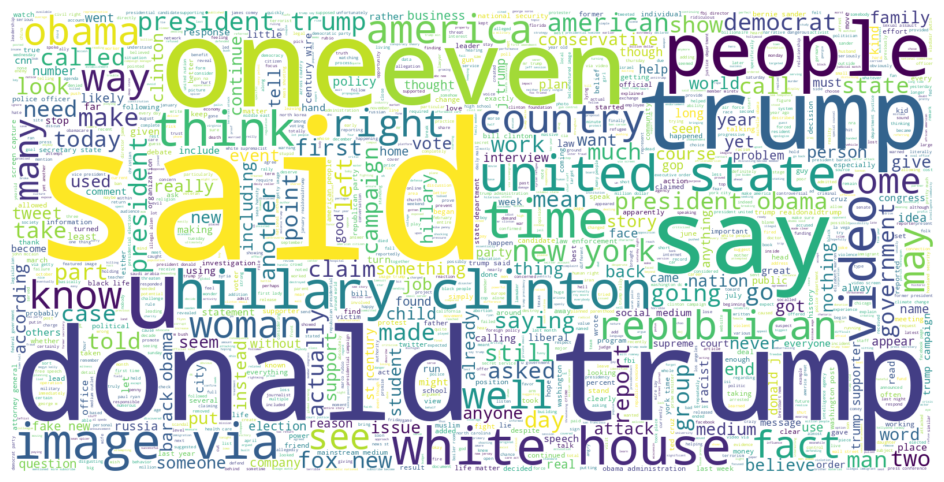

Text(0.5, 1.0, 'Word Cloud - Fake News')

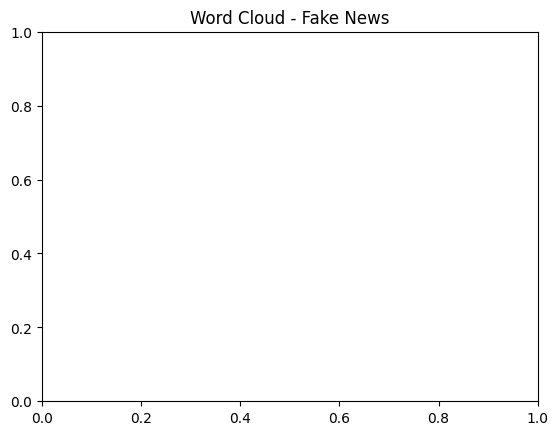

In [25]:
plot_wordcloud(1)  
plt.title("Word Cloud - Real News")

plot_wordcloud(0)  
plt.title("Word Cloud - Fake News")


In [26]:
df_ML = dff.copy()

In [27]:
df_ML.head()

,subject,label,full text
0,News,0,donald trump sends embarrassing new year eve m...
1,News,0,drunk bragging trump staffer started russian c...
2,News,0,sheriff david clarke becomes internet joke thr...
3,News,0,trump obsessed even obamas name coded website ...
4,News,0,pope francis called donald trump christmas spe...


In [28]:
encoder = LabelEncoder()
df_ML['subject_encoded'] = encoder.fit_transform(df_ML[['subject']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
df_ML.head()

,subject,label,full text,subject_encoded
0,News,0,donald trump sends embarrassing new year eve m...,2
1,News,0,drunk bragging trump staffer started russian c...,2
2,News,0,sheriff david clarke becomes internet joke thr...,2
3,News,0,trump obsessed even obamas name coded website ...,2
4,News,0,pope francis called donald trump christmas spe...,2


In [30]:
df_ML.drop('subject',axis=1,inplace=True)

In [31]:
df_ML.head()

,label,full text,subject_encoded
0,0,donald trump sends embarrassing new year eve m...,2
1,0,drunk bragging trump staffer started russian c...,2
2,0,sheriff david clarke becomes internet joke thr...,2
3,0,trump obsessed even obamas name coded website ...,2
4,0,pope francis called donald trump christmas spe...,2


In [32]:
df_ML = df_ML[['full text','subject_encoded','label']]
df_ML.head()


,full text,subject_encoded,label
0,donald trump sends embarrassing new year eve m...,2,0
1,drunk bragging trump staffer started russian c...,2,0
2,sheriff david clarke becomes internet joke thr...,2,0
3,trump obsessed even obamas name coded website ...,2,0
4,pope francis called donald trump christmas spe...,2,0


In [33]:
cv = CountVectorizer()
feature_cv = cv.fit_transform(df_ML['full text'])
print(feature_cv)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7182061 stored elements and shape (44898, 206674)>
  Coords	Values
  (0, 49248)	4
  (0, 187560)	9
  (0, 163748)	2
  (0, 53847)	1
  (0, 119120)	12
  (0, 204403)	17
  (0, 56470)	2
  (0, 110638)	2
  (0, 48265)	1
  (0, 201713)	5
  (0, 7083)	2
  (0, 74070)	6
  (0, 100260)	1
  (0, 87783)	1
  (0, 68774)	1
  (0, 166271)	1
  (0, 54601)	5
  (0, 74741)	6
  (0, 47773)	3
  (0, 59331)	3
  (0, 119200)	3
  (0, 109674)	3
  (0, 64125)	1
  (0, 149360)	1
  (0, 166294)	1
  :	:
  (44897, 1040)	1
  (44897, 61479)	2
  (44897, 113419)	1
  (44897, 196276)	1
  (44897, 186158)	1
  (44897, 34582)	3
  (44897, 91451)	1
  (44897, 86559)	5
  (44897, 43956)	1
  (44897, 86562)	3
  (44897, 35882)	1
  (44897, 36635)	1
  (44897, 13332)	2
  (44897, 175991)	1
  (44897, 193392)	1
  (44897, 3527)	1
  (44897, 61711)	1
  (44897, 157073)	1
  (44897, 158233)	1
  (44897, 158231)	1
  (44897, 175904)	1
  (44897, 54739)	1
  (44897, 104698)	1
  (44897, 132552)	1
  (44897, 1320

In [34]:
TfidfVectorizer = TfidfVectorizer()
feature_tfidf = TfidfVectorizer.fit_transform(df_ML['full text'])
print(feature_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7182061 stored elements and shape (44898, 206674)>
  Coords	Values
  (0, 84829)	0.01965823803826346
  (0, 24298)	0.0685619765235245
  (0, 7853)	0.038676605183332415
  (0, 125306)	0.08616664538962499
  (0, 110260)	0.028921532527781194
  (0, 204522)	0.02883148604230203
  (0, 203458)	0.031114429433054275
  (0, 141621)	0.023932104703356268
  (0, 70032)	0.02515327083785341
  (0, 28888)	0.047796003387869775
  (0, 182354)	0.036683396815573144
  (0, 78754)	0.045537030020921174
  (0, 196372)	0.03165687688398604
  (0, 148043)	0.08299598622877334
  (0, 125292)	0.030713839538243515
  (0, 65887)	0.052509684176999194
  (0, 199849)	0.08616664538962499
  (0, 199839)	0.059701364462143046
  (0, 180052)	0.027252518982672353
  (0, 179593)	0.04677864481385669
  (0, 9593)	0.04017109456048783
  (0, 181068)	0.08616664538962499
  (0, 161728)	0.08616664538962499
  (0, 157255)	0.046005689398371075
  (0, 22388)	0.03337433036602714
  :	:
  (44897, 17279

In [35]:
new_feature_cv = hstack([feature_cv,df_ML['subject_encoded'].values.reshape(-1,1)])
new_feature_tfidf = hstack([feature_tfidf,df_ML['subject_encoded'].values.reshape(-1,1)])

In [36]:
x_train_cv , x_test_cv , y_train_cv , y_test_cv = train_test_split(new_feature_cv ,df_ML['label'], test_size=.2 , random_state=42,stratify=df_ML['label'])
x_train_tfidf , x_test_tfidf , y_train_tfidf , y_test_tfidf = train_test_split(new_feature_tfidf ,df_ML['label'], test_size=.2 , random_state=42,stratify=df_ML['label'])

In [37]:
lr_cv = LogisticRegression(
    penalty='elasticnet',
    l1_ratio=0.5,
    C=0.5,
    solver='saga',
    max_iter=100,
    class_weight='balanced',
    fit_intercept=True,
    random_state=42,
    verbose=1
)
lr_cv.fit(x_train_cv,y_train_cv)

Epoch 1, change: 1.00000000
Epoch 2, change: 0.24688797
Epoch 3, change: 0.16416175
Epoch 4, change: 0.13306656
Epoch 5, change: 0.10800547
Epoch 6, change: 0.09080947
Epoch 7, change: 0.07891061
Epoch 8, change: 0.06953045
Epoch 9, change: 0.06218173
Epoch 10, change: 0.05622028
Epoch 11, change: 0.05127235
Epoch 12, change: 0.04700847
Epoch 13, change: 0.04342951
Epoch 14, change: 0.04034328
Epoch 15, change: 0.03737676
Epoch 16, change: 0.03500198
Epoch 17, change: 0.03294589
Epoch 18, change: 0.03077657
Epoch 19, change: 0.02918632
Epoch 20, change: 0.02755324
Epoch 21, change: 0.02620262
Epoch 22, change: 0.02489878
Epoch 23, change: 0.02378964
Epoch 24, change: 0.02272628
Epoch 25, change: 0.02177279
Epoch 26, change: 0.02088156
Epoch 27, change: 0.02005188
Epoch 28, change: 0.01927991
Epoch 29, change: 0.01858025
Epoch 30, change: 0.01791579
Epoch 31, change: 0.01729134
Epoch 32, change: 0.01669748
Epoch 33, change: 0.01616341
Epoch 34, change: 0.01565155
Epoch 35, change: 0.015

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.3min finished


LogisticRegression(C=0.5, class_weight='balanced', l1_ratio=0.5,
                   penalty='elasticnet', random_state=42, solver='saga',
                   verbose=1)

In [43]:
y_pred_lr_cv = lr_cv.predict(x_test_cv)

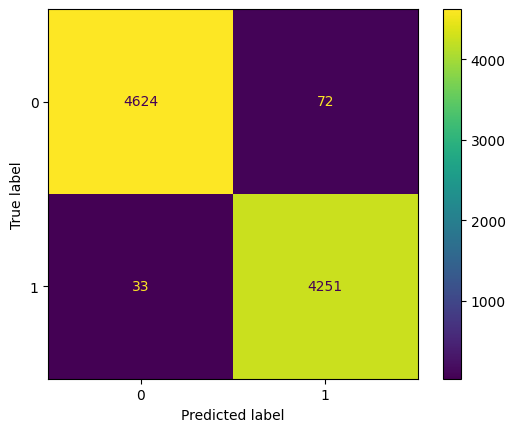

In [44]:
dsly = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_cv,y_pred_lr_cv))
dsly.plot()
plt.show()

In [45]:
lr_accuracy = metrics.accuracy_score(y_test_cv,y_pred_lr_cv)
lr_accuracy

0.9883073496659243

In [46]:
precision = precision_score(y_test_cv, y_pred_lr_cv)
recall = recall_score(y_test_cv, y_pred_lr_cv)
f1 = f1_score(y_test_cv, y_pred_lr_cv)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9833448993754337
Recall: 0.992296918767507
F1-score: 0.9878006273963054


In [47]:
print("classification_report :")
print(classification_report(y_test_cv, y_pred_lr_cv))

classification_report :
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [48]:
mnb_cv = MultinomialNB(alpha=.0001, force_alpha=True)
mnb_cv.fit(x_train_cv,y_train_cv)

MultinomialNB(alpha=0.0001, force_alpha=True)

In [49]:
y_pred_mnb_cv = mnb_cv.predict(x_test_cv)

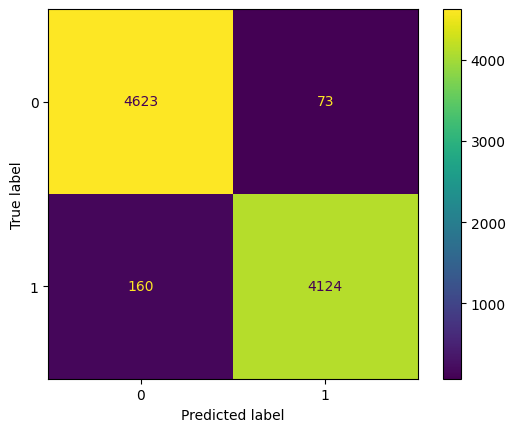

In [50]:
dsly = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_cv,y_pred_mnb_cv))
dsly.plot()
plt.show()

In [51]:
mnb_accuracy = metrics.accuracy_score(y_test_cv,y_pred_mnb_cv)
mnb_accuracy

0.974053452115813

In [52]:
precision = precision_score(y_test_cv, y_pred_mnb_cv)
recall = recall_score(y_test_cv, y_pred_mnb_cv)
f1 = f1_score(y_test_cv, y_pred_mnb_cv)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9826066237788896
Recall: 0.9626517273576097
F1-score: 0.9725268246669024


In [53]:
print("classification_report :")
print(classification_report(y_test_cv,y_pred_mnb_cv))

classification_report :
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4696
           1       0.98      0.96      0.97      4284

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



In [54]:
lsvc_cv = LinearSVC(
    C=0.1,
    penalty="l2",
    loss="squared_hinge",
    dual=False,
    max_iter=5000,
    random_state=42,
    tol=1e-5,
    class_weight="balanced"
)
lsvc_cv.fit(x_train_cv, y_train_cv)

LinearSVC(C=0.1, class_weight='balanced', dual=False, max_iter=5000,
          random_state=42, tol=1e-05)

In [55]:
y_pred_lsvc_cv = lsvc_cv.predict(x_test_cv)

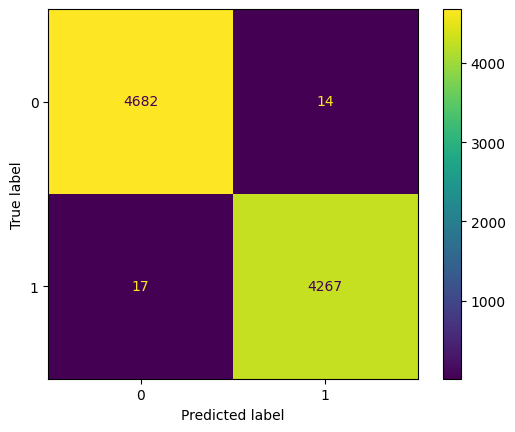

In [56]:
dsly = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_cv,y_pred_lsvc_cv))
dsly.plot()
plt.show()

In [57]:
lscv_accuracy = metrics.accuracy_score(y_test_cv,y_pred_lsvc_cv)
lscv_accuracy

0.9965478841870824

In [58]:
precision = precision_score(y_test_cv, y_pred_lsvc_cv)
recall = recall_score(y_test_cv, y_pred_lsvc_cv)
f1 = f1_score(y_test_cv, y_pred_lsvc_cv)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9967297360429807
Recall: 0.996031746031746
F1-score: 0.9963806187974316


In [59]:
print("classification_report :")
print(classification_report(y_test_cv,y_pred_lsvc_cv))

classification_report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [60]:
lr_tfidf = LogisticRegression(
    penalty='elasticnet',
    l1_ratio=0.5,
    C=0.5,
    solver='saga',
    max_iter=100,
    class_weight='balanced',
    fit_intercept=True,
    random_state=42,
    verbose=1
)
lr_tfidf.fit(x_train_tfidf,y_train_tfidf)

Epoch 1, change: 1.00000000
Epoch 2, change: 0.24955205
Epoch 3, change: 0.14608362
Epoch 4, change: 0.10215720
Epoch 5, change: 0.07897501
Epoch 6, change: 0.06688728
Epoch 7, change: 0.05837906
Epoch 8, change: 0.05167424
Epoch 9, change: 0.04607259
Epoch 10, change: 0.04155319
Epoch 11, change: 0.03765086
Epoch 12, change: 0.03427301
Epoch 13, change: 0.03137066
Epoch 14, change: 0.02876548
Epoch 15, change: 0.02652468
Epoch 16, change: 0.02447487
Epoch 17, change: 0.02265099
Epoch 18, change: 0.02098724
Epoch 19, change: 0.01948681
Epoch 20, change: 0.01814318
Epoch 21, change: 0.01690433
Epoch 22, change: 0.01573995
Epoch 23, change: 0.01458916
Epoch 24, change: 0.01353234
Epoch 25, change: 0.01255976
Epoch 26, change: 0.01165671
Epoch 27, change: 0.01083926
Epoch 28, change: 0.01008233
Epoch 29, change: 0.00939445
Epoch 30, change: 0.00874060
Epoch 31, change: 0.00814186
Epoch 32, change: 0.00758462
Epoch 33, change: 0.00706867
Epoch 34, change: 0.00658194
Epoch 35, change: 0.006

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.2s finished


LogisticRegression(C=0.5, class_weight='balanced', l1_ratio=0.5,
                   penalty='elasticnet', random_state=42, solver='saga',
                   verbose=1)

In [62]:
y_pred_lr_tfidf = lr_tfidf.predict(x_test_tfidf)

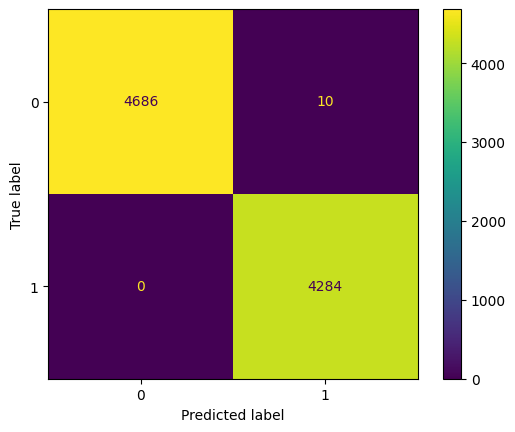

In [63]:
dsly = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_tfidf,y_pred_lr_tfidf))
dsly.plot()
plt.show()

In [64]:
lr_accuracy = metrics.accuracy_score(y_test_tfidf,y_pred_lr_tfidf)
lr_accuracy

0.9988864142538976

In [65]:
precision = precision_score(y_test_tfidf, y_pred_lr_tfidf)
recall = recall_score(y_test_tfidf, y_pred_lr_tfidf)
f1 = f1_score(y_test_tfidf, y_pred_lr_tfidf)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9976711690731253
Recall: 1.0
F1-score: 0.9988342270925623


In [66]:
print("classification_report :")
print(classification_report(y_test_tfidf, y_pred_lr_tfidf))

classification_report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [67]:
mnb_tfidf = MultinomialNB(alpha=.0001, force_alpha=True)
mnb_tfidf.fit(x_train_tfidf,y_train_tfidf)

MultinomialNB(alpha=0.0001, force_alpha=True)

In [68]:
y_pred_mnb_tfidf = mnb_tfidf.predict(x_test_tfidf)

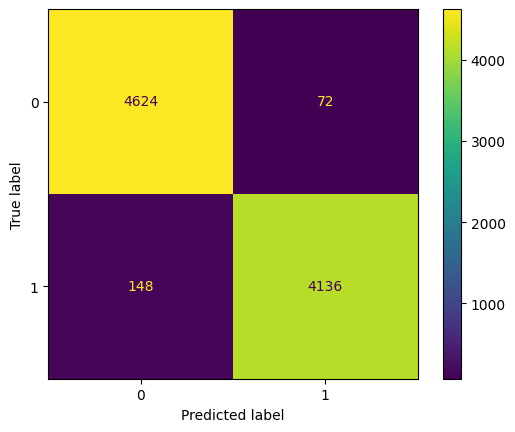

In [69]:
dsly = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_tfidf,y_pred_mnb_tfidf))
dsly.plot()
plt.show()

In [70]:
mnb_accuracy = metrics.accuracy_score(y_test_tfidf,y_pred_mnb_tfidf)
mnb_accuracy

0.9755011135857461

In [71]:
precision = precision_score(y_test_tfidf, y_pred_mnb_tfidf)
recall = recall_score(y_test_tfidf, y_pred_mnb_tfidf)
f1 = f1_score(y_test_tfidf, y_pred_mnb_tfidf)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.9828897338403042
Recall: 0.965452847805789
F1-score: 0.9740932642487046


In [72]:
print("classification_report :")
print(classification_report(y_test_tfidf, y_pred_mnb_tfidf))

classification_report :
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4696
           1       0.98      0.97      0.97      4284

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [73]:
lsvc_tfidf = LinearSVC(
    C=0.2,
    penalty="l2",
    loss="squared_hinge",
    dual=False,
    max_iter=5000,
    random_state=42,
    tol=1e-5,
    class_weight="balanced"
)
lsvc_tfidf.fit(x_train_tfidf, y_train_tfidf)

LinearSVC(C=0.2, class_weight='balanced', dual=False, max_iter=5000,
          random_state=42, tol=1e-05)

In [74]:
y_pred_lsvc_tfidf = lsvc_tfidf.predict(x_test_tfidf)

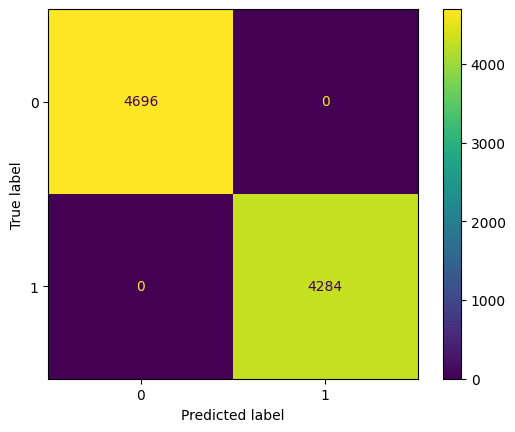

In [75]:
dsly = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_tfidf,y_pred_lsvc_tfidf))
dsly.plot()
plt.show()

In [76]:
lsvc_accuracy = metrics.accuracy_score(y_test_tfidf,y_pred_lsvc_tfidf)
lsvc_accuracy

1.0

In [77]:
recision = precision_score(y_test_tfidf, y_pred_lsvc_tfidf)
recall = recall_score(y_test_tfidf, y_pred_lsvc_tfidf)
f1 = f1_score(y_test_tfidf, y_pred_lsvc_tfidf)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9828897338403042
Recall: 1.0
F1-score: 1.0


In [78]:
print("classification_report :")
print(classification_report(y_test_tfidf, y_pred_lsvc_tfidf))

classification_report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [79]:
def clean_text_seq(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]','',text)

    return text


In [80]:
df_seq = df.copy()

In [81]:
df_seq['full text'] = df_seq['title'] +' ' + df_seq['text']


In [82]:
df_seq.drop(['title','text','date','subject'],axis=1, inplace=True)

In [83]:
df_seq.head()

,label,full text
0,0,Donald Trump Sends Out Embarrassing New Year’...
1,0,Drunk Bragging Trump Staffer Started Russian ...
2,0,Sheriff David Clarke Becomes An Internet Joke...
3,0,Trump Is So Obsessed He Even Has Obama’s Name...
4,0,Pope Francis Just Called Out Donald Trump Dur...


In [84]:
df_seq['full text'] = df_seq['full text'].apply(clean_text_seq)

In [85]:
df_seq.head()

,label,full text
0,0,donald trump sends out embarrassing new years...
1,0,drunk bragging trump staffer started russian ...
2,0,sheriff david clarke becomes an internet joke...
3,0,trump is so obsessed he even has obamas name ...
4,0,pope francis just called out donald trump dur...


In [86]:
x = df_seq['full text']
y = df_seq['label']

x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=.2 , random_state=42, stratify=y)

In [87]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token='<UNK>')
tokenizer.fit_on_texts(x_train)

In [88]:
word_index = tokenizer.word_index
word_index

{'<UNK>': 1,
 'the': 2,
 'to': 3,
 'of': 4,
 'a': 5,
 'and': 6,
 'in': 7,
 'that': 8,
 'on': 9,
 'for': 10,
 's': 11,
 'is': 12,
 'he': 13,
 'said': 14,
 'trump': 15,
 'it': 16,
 'with': 17,
 'was': 18,
 'as': 19,
 'his': 20,
 'by': 21,
 'has': 22,
 'be': 23,
 'have': 24,
 'not': 25,
 'from': 26,
 'this': 27,
 'at': 28,
 'are': 29,
 'who': 30,
 'us': 31,
 'an': 32,
 'they': 33,
 'i': 34,
 'but': 35,
 'we': 36,
 'would': 37,
 'president': 38,
 'about': 39,
 'will': 40,
 'their': 41,
 'you': 42,
 'had': 43,
 't': 44,
 'been': 45,
 'were': 46,
 'people': 47,
 'more': 48,
 'or': 49,
 'after': 50,
 'which': 51,
 'she': 52,
 'her': 53,
 'one': 54,
 'if': 55,
 'out': 56,
 'its': 57,
 'all': 58,
 'what': 59,
 'new': 60,
 'state': 61,
 'when': 62,
 'also': 63,
 'up': 64,
 'there': 65,
 'no': 66,
 'over': 67,
 'house': 68,
 'reuters': 69,
 'donald': 70,
 'clinton': 71,
 'our': 72,
 'obama': 73,
 'states': 74,
 'government': 75,
 'can': 76,
 'just': 77,
 'him': 78,
 'so': 79,
 'republican': 80,
 

In [89]:
x_train_seq = tokenizer.texts_to_sequences(x_train)

In [90]:
print(x_train_seq[0])


[1, 148, 66, 2927, 7, 2446, 4, 126, 820, 1496, 1008, 69, 1122, 724, 1, 1, 9, 207, 1490, 2, 2898, 126, 820, 11, 1410, 8, 16, 43, 3642, 3, 1, 2, 103, 21, 3652, 1496, 1, 1, 162, 11, 1591, 9, 234, 3, 478, 49, 470, 5, 724, 946, 5585, 7808, 9, 2734, 1464, 6, 7, 1070, 4, 58, 2697, 2617, 261, 425, 86, 946, 96, 127, 2952, 16, 14, 7, 5, 183, 1254, 2, 1775, 4, 32, 946, 28, 1355, 1, 1, 5, 466, 795, 4, 820, 126, 210, 2, 724, 4, 999, 10, 2, 177, 3, 24, 5, 724, 946, 19, 32, 1213, 1355, 1, 1, 1141, 3, 2, 724, 4, 999, 11, 2617, 6, 1224, 2, 683, 1442, 547, 2, 177, 11, 2697, 4300, 1355, 1, 1, 12, 206, 4, 2, 1122, 6652, 2734, 886, 4, 1]


In [91]:
decoded = tokenizer.sequences_to_texts(x_train_seq)
decoded[0]

'<UNK> says no wrongdoing in handling of national front accounts paris reuters french bank <UNK> <UNK> on wednesday rejected the farright national front s accusations that it had acted to <UNK> the party by closing accounts <UNK> <UNK> group s decisions on whether to open or close a bank account depend purely on banking reasons and in respect of all regulatory requirements without taking into account any political consideration it said in a statement regarding the opening of an account at credit <UNK> <UNK> a financial representative of front national asked the bank of france for the right to have a bank account as an individual credit <UNK> <UNK> responded to the bank of france s requirements and offered the services required within the right s regulatory framework credit <UNK> <UNK> is part of the french retail banking network of <UNK>'

In [92]:
max_len = 200
x_train_padded = pad_sequences(x_train_seq, maxlen=max_len)

In [93]:
print(f"Shape of padded training data: {x_train_padded.shape}")

Shape of padded training data: (35918, 200)


In [94]:
test_sequences  = tokenizer.texts_to_sequences(x_test)

In [95]:
x_test_padded  = pad_sequences(test_sequences,  maxlen=max_len, padding='post')

In [96]:
# RNN
def create_rnn_model(max_words, embedding_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=input_length))
    model.add(SimpleRNN(units=128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# LSTM
def create_lstm_model(max_words, embedding_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=input_length))
    model.add(LSTM(units=128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# GRU
def create_gru_model(max_words, embedding_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=input_length))
    model.add(GRU(units=128))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [97]:
# Define model parameters
max_words = 10000
embedding_dim = 128
input_length = 100
epochs = 5
batch_size = 64

In [98]:
# Train RNN model
rnn_model = create_rnn_model(max_words, embedding_dim, input_length)
print("Training RNN model...")
rnn_history = rnn_model.fit(x_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
print(rnn_model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-09-01 15:21:46.177233: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Training RNN model...
Epoch 1/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 37s 75ms/step - accuracy: 0.8560 - loss: 0.3074 - val_accuracy: 0.9584 - val_loss: 0.1230
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 33s 74ms/step - accuracy: 0.9685 - loss: 0.0926 - val_accuracy: 0.9659 - val_loss: 0.1084
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 33s 72ms/step - accuracy: 0.9514 - loss: 0.1332 - val_accuracy: 0.8970 - val_loss: 0.2416
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.9634 - loss: 0.0982 - val_accuracy: 0.9215 - val_loss: 0.1940
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.9375 - loss: 0.1551 - val_accuracy: 0.9614 - val_loss: 0.1155


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,939,077 (15.03 MB)

 Trainable params: 1,313,025 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,626,052 (10.02 MB)

None


In [99]:
y_pred_probs = rnn_model.predict(x_test_padded)
y_pred_rnn = (y_pred_probs > 0.5).astype("int32")

281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step


In [100]:
precision = precision_score(y_test, y_pred_rnn)
recall = recall_score(y_test, y_pred_rnn)
f1 = f1_score(y_test, y_pred_rnn)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9586830213040671
Recall: 0.6932773109243697
F1-score: 0.8046599837442427


In [101]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_rnn))


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.86      4696
           1       0.96      0.69      0.80      4284

    accuracy                           0.84      8980
   macro avg       0.87      0.83      0.83      8980
weighted avg       0.86      0.84      0.84      8980



In [102]:
# Train LSTM model
lstm_model = create_lstm_model(max_words, embedding_dim, input_length)
print("Training LSTM model...")
lstm_history = lstm_model.fit(x_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
print(lstm_model.summary())

Training LSTM model...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


449/449 ━━━━━━━━━━━━━━━━━━━━ 123s 265ms/step - accuracy: 0.9032 - loss: 0.2549 - val_accuracy: 0.9698 - val_loss: 0.0909
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 118s 264ms/step - accuracy: 0.9858 - loss: 0.0465 - val_accuracy: 0.9776 - val_loss: 0.0681
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 119s 264ms/step - accuracy: 0.9837 - loss: 0.0479 - val_accuracy: 0.9783 - val_loss: 0.0677
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 119s 264ms/step - accuracy: 0.9962 - loss: 0.0118 - val_accuracy: 0.9822 - val_loss: 0.0701
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 118s 264ms/step - accuracy: 0.9981 - loss: 0.0071 - val_accuracy: 0.9837 - val_loss: 0.0685


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,235,141 (16.16 MB)

 Trainable params: 1,411,713 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,823,428 (10.77 MB)

None


In [103]:
y_pred_probs_lstm = lstm_model.predict(x_test_padded)
y_pred_lstm = (y_pred_probs_lstm > 0.5).astype("int32")

281/281 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step


In [104]:
recision = precision_score(y_test, y_pred_lstm) 
recall = recall_score(y_test, y_pred_lstm)
f1 = f1_score(y_test, y_pred_lstm)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9586830213040671
Recall: 0.7056489262371616
F1-score: 0.8223612622415668


In [105]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_lstm))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.99      0.88      4696
           1       0.99      0.71      0.82      4284

    accuracy                           0.85      8980
   macro avg       0.89      0.85      0.85      8980
weighted avg       0.88      0.85      0.85      8980



In [106]:
# Train GRU model
gru_model = create_gru_model(max_words, embedding_dim, input_length)
print("Training GRU model...")
gru_history = gru_model.fit(x_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
print(gru_model.summary())

Training GRU model...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


449/449 ━━━━━━━━━━━━━━━━━━━━ 121s 262ms/step - accuracy: 0.9004 - loss: 0.2394 - val_accuracy: 0.9726 - val_loss: 0.0821
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 117s 261ms/step - accuracy: 0.9875 - loss: 0.0394 - val_accuracy: 0.9726 - val_loss: 0.0867
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 117s 261ms/step - accuracy: 0.9944 - loss: 0.0178 - val_accuracy: 0.9851 - val_loss: 0.0486
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 132s 293ms/step - accuracy: 0.9970 - loss: 0.0111 - val_accuracy: 0.9884 - val_loss: 0.0419
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 115s 257ms/step - accuracy: 0.9969 - loss: 0.0120 - val_accuracy: 0.9859 - val_loss: 0.0506


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,137,605 (15.78 MB)

 Trainable params: 1,379,201 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,758,404 (10.52 MB)

None


In [107]:
y_pred_probs_gru = gru_model.predict(x_test_padded)
y_pred_gru = (y_pred_probs_gru > 0.5).astype("int32")

281/281 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step


In [108]:
recision = precision_score(y_test, y_pred_gru)
recall = recall_score(y_test, y_pred_gru)
f1 = f1_score(y_test, y_pred_gru)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9586830213040671
Recall: 0.6984126984126984
F1-score: 0.816705336426914


In [109]:
print(classification_report(y_test, y_pred_gru))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      4696
           1       0.98      0.70      0.82      4284

    accuracy                           0.85      8980
   macro avg       0.88      0.84      0.85      8980
weighted avg       0.88      0.85      0.85      8980



In [110]:
# Function to plot training history
def plot_history(history, model_name):
    # Plotting accuracy
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()



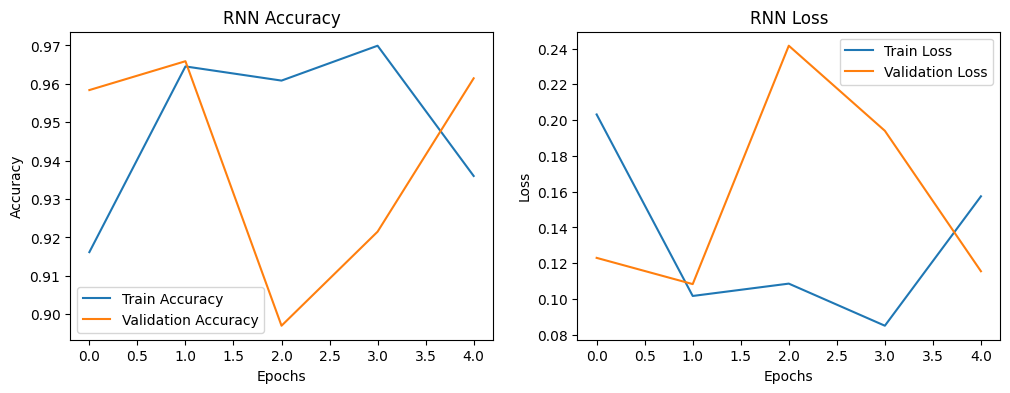

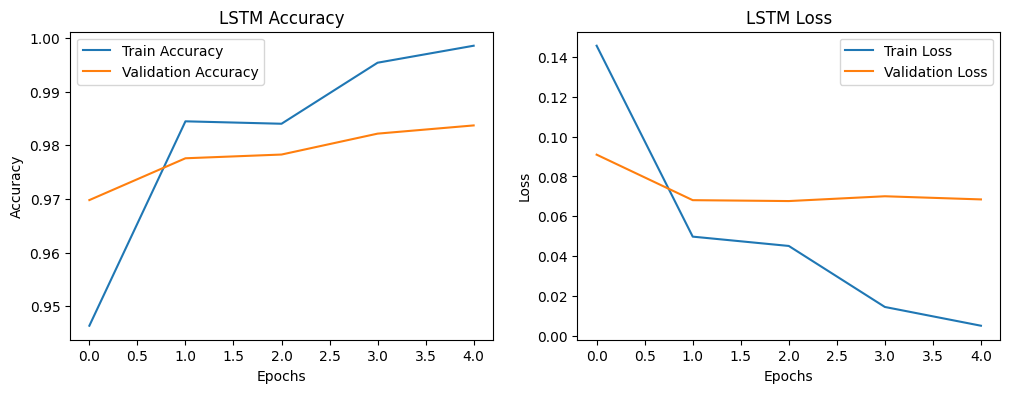

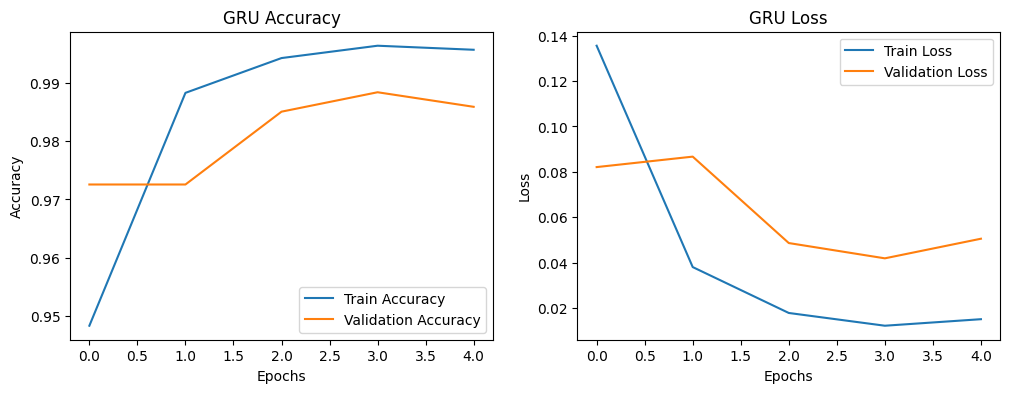

In [111]:
# Plotting the training history for each model
plot_history(rnn_history, 'RNN')
plot_history(lstm_history, 'LSTM')
plot_history(gru_history, 'GRU')

In [112]:
# Evaluate RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(x_test_padded, y_test)
print(f"RNN Accuracy: {rnn_accuracy:.4f}")

281/281 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8349 - loss: 0.5889
RNN Accuracy: 0.8394


In [113]:
# # Evaluate LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test_padded, y_test)
print(f"LSTM Accuracy: {lstm_accuracy:.4f}")

281/281 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - accuracy: 0.8512 - loss: 1.0236
LSTM Accuracy: 0.8546


In [114]:
# Evaluate GRU model
gru_loss, gru_accuracy = gru_model.evaluate(x_test_padded, y_test)
print(f"GRU Accuracy: {gru_accuracy:.4f}")

281/281 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.8479 - loss: 3.0523
GRU Accuracy: 0.8504


In [115]:
def clean_text_trans(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]','',text)
    text = word_tokenize(text)
    return text

In [116]:
df_trans = df.copy()
df_trans.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [117]:
df_trans['full text'] = df_trans['title'] +' ' + df_trans['text']


In [118]:
df_trans.drop(['title','text','date','subject'],axis=1, inplace=True)

In [119]:
df_trans['full text'] = df_trans['full text'].apply(clean_text_trans)

In [120]:
df_trans.head()

,label,full text
0,0,"[donald, trump, sends, out, embarrassing, new,..."
1,0,"[drunk, bragging, trump, staffer, started, rus..."
2,0,"[sheriff, david, clarke, becomes, an, internet..."
3,0,"[trump, is, so, obsessed, he, even, has, obama..."
4,0,"[pope, francis, just, called, out, donald, tru..."


In [121]:
X = df_trans['full text']
Y = df_trans['label']

In [122]:
embedding_dim = 100

w2v_model = Word2Vec(sentences=X, vector_size=embedding_dim, window=5, min_count=1)

In [123]:
max_words = 200000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)

In [124]:
X = tokenizer.texts_to_sequences(X)

In [125]:
maxlen = 200

X_padded = pad_sequences(X, maxlen=maxlen)

In [126]:
def get_weight_matrix(model, vocab, embedding_dim, max_words=None):
   
    vocab_size = len(vocab) + 1
    if max_words:
        vocab_size = min(vocab_size, max_words)
    
    # initialize weight matrix
    weight_matrix = np.zeros((vocab_size, embedding_dim))
    
    # fill with word2vec embeddings
    for word, i in vocab.items():
        if i >= vocab_size:
            continue
        if word in model.wv:
            weight_matrix[i] = model.wv[word]
    
    return weight_matrix



In [127]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index,embedding_dim)

In [128]:
X_train_w2v, X_test_w2v, Y_train, Y_test = train_test_split(X_padded, Y, test_size=0.2, random_state=42, stratify=Y)

In [129]:
vocab_size = embedding_vectors.shape[0] 
embedding_dim = embedding_vectors.shape[1]


In [130]:
def lstm_model(vocab_size, embedding_dim, input_length, embedding_matrix):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size,
                        output_dim=embedding_dim,
                        input_length=input_length,
                        weights=[embedding_matrix],
                        trainable=False))  # Pretrained embeddings
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train LSTM model
lstm_model_w2v = lstm_model(vocab_size, embedding_dim, input_length,embedding_vectors)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [131]:
epochs = 5
batch_size = 32

history = lstm_model_w2v.fit(
    X_train_w2v, Y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.2
)

Epoch 1/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 163s 177ms/step - accuracy: 0.9121 - loss: 0.2208 - val_accuracy: 0.9588 - val_loss: 0.1151
Epoch 2/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 158s 176ms/step - accuracy: 0.9644 - loss: 0.1044 - val_accuracy: 0.9726 - val_loss: 0.0785
Epoch 3/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 157s 175ms/step - accuracy: 0.9757 - loss: 0.0743 - val_accuracy: 0.9781 - val_loss: 0.0607
Epoch 4/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 157s 175ms/step - accuracy: 0.9842 - loss: 0.0485 - val_accuracy: 0.9811 - val_loss: 0.0568
Epoch 5/5
898/898 ━━━━━━━━━━━━━━━━━━━━ 161s 180ms/step - accuracy: 0.9878 - loss: 0.0366 - val_accuracy: 0.9871 - val_loss: 0.0450


In [132]:
y_pred_probs_lstm_w2v = lstm_model_w2v.predict(X_test_w2v)
y_pred_lstm_w2v = (y_pred_probs_lstm_w2v > 0.5).astype("int32")

281/281 ━━━━━━━━━━━━━━━━━━━━ 19s 67ms/step


In [133]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_lstm_w2v))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [134]:
df_trans_gl = df.copy()
df_trans_gl.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [135]:
df_trans_gl['full text'] = df_trans_gl['title'] +' ' + df_trans_gl['text']

In [136]:
df_trans_gl.drop(['title','text','date','subject'],axis=1, inplace=True)

In [137]:
df_trans_gl['full text'] = df_trans_gl['full text'].apply(clean_text_trans)

In [138]:
df_trans_gl.head()

,label,full text
0,0,"[donald, trump, sends, out, embarrassing, new,..."
1,0,"[drunk, bragging, trump, staffer, started, rus..."
2,0,"[sheriff, david, clarke, becomes, an, internet..."
3,0,"[trump, is, so, obsessed, he, even, has, obama..."
4,0,"[pope, francis, just, called, out, donald, tru..."


In [139]:
xx = df_trans_gl['full text']
yy = df_trans_gl['label']

In [140]:
X_train_glove, X_test_glove,y_train_glove, y_test_glove= train_test_split(xx, yy, test_size=0.2, random_state=42, stratify=Y)


In [141]:
max_features = 10000
maxlen = 300
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train_glove)
tokenized_train = tokenizer.texts_to_sequences(X_train_glove)
X_train_pad_glov = pad_sequences(tokenized_train, maxlen=maxlen)
tokenized_test = tokenizer.texts_to_sequences(X_test_glove)
x_test_pad_glov = pad_sequences(tokenized_test, maxlen=maxlen)

In [145]:
def load_embeddings(embedding_source, word_index, max_features):
    embeddings_index = {}
    embed_size = None

    # Case 1: Gensim KeyedVectors
    if hasattr(embedding_source, "key_to_index"):  
        embed_size = embedding_source.vector_size
        for word in embedding_source.key_to_index:
            embeddings_index[word] = embedding_source[word]

    # Case 2: File path (GloVe .txt)
    elif isinstance(embedding_source, str):
        with open(embedding_source, encoding="utf-8") as f:
            for line in f:
                word, *vector = line.rstrip().split(" ")
                vector = np.asarray(vector, dtype="float32")
                embeddings_index[word] = vector
                if embed_size is None:
                    embed_size = len(vector)
    else:
        raise ValueError("embedding_source must be either a file path (str) or a gensim KeyedVectors object.")

    # Compute stats for random initialization
    all_embs = np.stack(list(embeddings_index.values()))
    emb_mean, emb_std = all_embs.mean(), all_embs.std()

    # Build embedding matrix
    nb_words = min(max_features, len(word_index) + 1)
    embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))

    for word, i in word_index.items():
        if i >= max_features:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    embedding_matrix[0] = 0  # pad index

    return embedding_matrix, embed_size


In [143]:
import gensim.downloader as api
word2vec_model = api.load("glove-wiki-gigaword-50") 

[==================================================] 100.0% 66.0/66.0MB downloaded


In [146]:
EMBEDDING_FILE = word2vec_model
embedding_matrix, embed_size = load_embeddings(EMBEDDING_FILE, tokenizer.word_index, max_features)


In [147]:
batch_size = 256
epochs = 3

model = Sequential()
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
model.add(LSTM(units=128, return_sequences=True, recurrent_dropout=0.25, dropout=0.25))
model.add(LSTM(units=64, recurrent_dropout=0.1, dropout=0.1))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_pad_glov, y_train_glove, batch_size=batch_size, validation_data=(x_test_pad_glov, y_test_glove), epochs=epochs)

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


141/141 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.8021 - loss: 0.4368 - val_accuracy: 0.9112 - val_loss: 0.2252
Epoch 2/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.8974 - loss: 0.2536 - val_accuracy: 0.9340 - val_loss: 0.1776
Epoch 3/3
141/141 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.9214 - loss: 0.2000 - val_accuracy: 0.9481 - val_loss: 0.1414


In [148]:
print("Accuracy on Training Data:", model.evaluate(X_train_pad_glov, y_train_glove)[1] * 100, "%")
print("Accuracy on Testing Data:", model.evaluate(x_test_pad_glov, y_test_glove)[1] * 100, "%")

1123/1123 ━━━━━━━━━━━━━━━━━━━━ 103s 92ms/step - accuracy: 0.9458 - loss: 0.1430
Accuracy on Training Data: 94.61829662322998 %
281/281 ━━━━━━━━━━━━━━━━━━━━ 26s 92ms/step - accuracy: 0.9438 - loss: 0.1507
Accuracy on Testing Data: 94.81068849563599 %


281/281 ━━━━━━━━━━━━━━━━━━━━ 27s 92ms/step
              precision    recall  f1-score   support

        Fake       0.94      0.96      0.95      4696
    Not Fake       0.96      0.93      0.94      4284

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



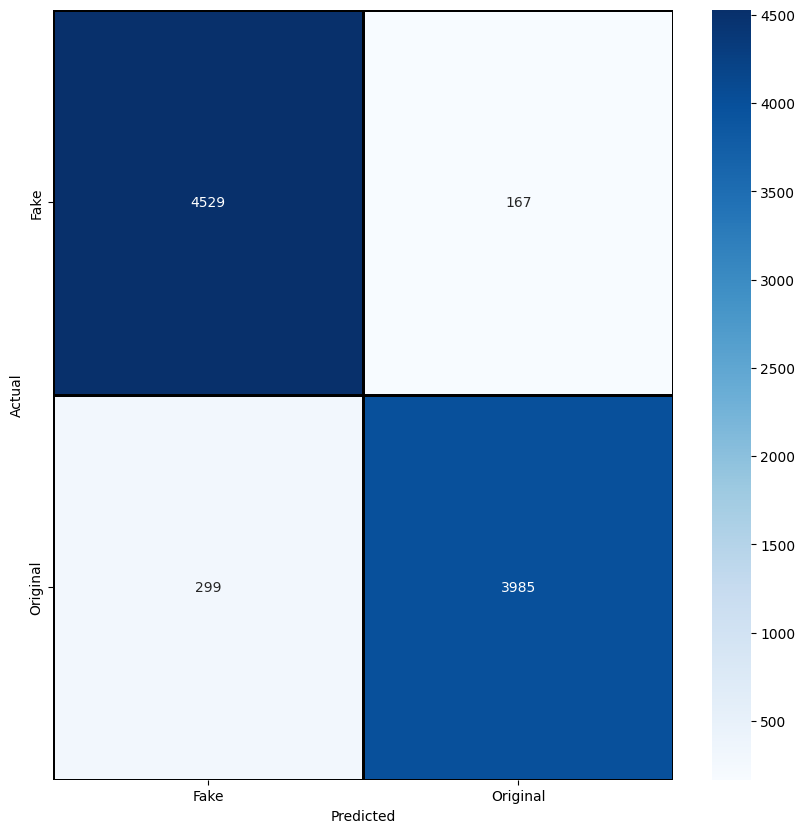

In [149]:
pred_probabilities = model.predict(x_test_pad_glov)

# Threshold predicted probabilities to get predicted classes
pred_glove = (pred_probabilities > 0.5).astype('int32')

print(classification_report(y_test_glove, pred_glove, target_names=['Fake', 'Not Fake']))
cm = confusion_matrix(y_test_glove, pred_glove)
cm = pd.DataFrame(cm, index=['Fake', 'Original'], columns=['Fake', 'Original'])

plt.figure(figsize=(10, 10))
sns.heatmap(cm, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='', xticklabels=['Fake', 'Original'], yticklabels=['Fake', 'Original'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [150]:
XX = df_trans['full text']
YY = df_trans['label']

In [151]:
def get_embeddings(texts, tokenizer, model, max_len=128):
    model.eval()  # no training
    embeddings = []
    for text in texts:
        # tokenize
        enc = tokenizer(text, truncation=True, padding="max_length", max_length=max_len, return_tensors="pt")

        with torch.no_grad():  # disable gradient
            output = model(**enc)
            # CLS token embedding
            emb = output.last_hidden_state[:,0,:].numpy()
        embeddings.append(emb.squeeze())
    return np.array(embeddings)

In [152]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
bert_model = BertModel.from_pretrained('bert-base-uncased' , num_labels=2)

In [ ]:
bert_emb = get_embeddings(XX, bert_tokenizer, bert_model)
print("BERT emb shape:", bert_emb.shape)

In [ ]:
x_b_train, x_b_test, y_b_train, y_b_test = train_test_split(bert_emb, YY, test_size=0.2, random_state=42)

In [ ]:
clf = LogisticRegression(max_iter=1000)
clf.fit(x_b_train, y_b_train)

In [ ]:
y_b_pred = clf.predict(x_b_test)
print("Accuracy:", accuracy_score(y_b_test, y_b_pred))
print(classification_report(y_b_test, y_b_pred))

In [ ]:
distil_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
distil_model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)



In [ ]:
distil_emb = get_embeddings(XX, distil_tokenizer, distil_model)
print("DistilBERT emb shape:", distil_emb.shape)

In [ ]:
x_db_train, x_db_test, y_db_train, y_db_test = train_test_split(distil_emb, YY, test_size=0.2, random_state=42)


In [ ]:
clf = LogisticRegression(max_iter=1000)
clf.fit(x_db_train, y_db_train)

In [ ]:
y_db_pred = clf.predict(x_db_test)
print("Accuracy:", accuracy_score(y_db_test, y_db_pred))
print(classification_report(y_db_test, y_db_pred))